# Problem definition

A Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

This is a standard supervised classification task. A classification problem where we have to predict whether a loan would be approved or not. In a classification problem, we have to predict discrete values based on a given set of independent variable(s).Classification can be of two types:

Supervised: The labels are included in the training data and the goal is to train a model to learn to predict the labels from the features.

Binary Classification : In this classification we have to predict either of the two given classes.

# Find the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

%matplotlib inline
# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

# Loading data: calling through Kaggle Api

In [2]:
f

In [3]:
import kaggle

In [4]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [5]:
api.dataset_download_file('altruistdelhite04/loan-prediction-problem-dataset',
                          file_name='train_u6lujuX_CVtuZ9i.csv')

False

# Read the Data

In [6]:
loan=pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Explore and Clean the Data

In [8]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
loan.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
loan.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
loan.isna().sum().sum()

149

In [14]:
is_NaN = loan.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = loan[row_has_NaN]
rows_with_NaN

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,LP002933,NaN,No,3+,Graduate,Yes,9357,0.0,292.0,360.0,1.0,Semiurban,Y
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
601,LP002950,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155.0,360.0,1.0,Rural,Y


In [15]:
loan[loan['Gender'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [16]:
loan=loan.fillna(0)

In [17]:
loan.isna().sum().sum()

0

In [18]:
loan.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
null_columns=loan.columns[loan.isnull().any()]

In [20]:
print(loan[loan.isnull().any(axis=1)][null_columns].head())

Empty DataFrame
Columns: []
Index: []


In [21]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Analysis and visualization

Analysing the input features

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


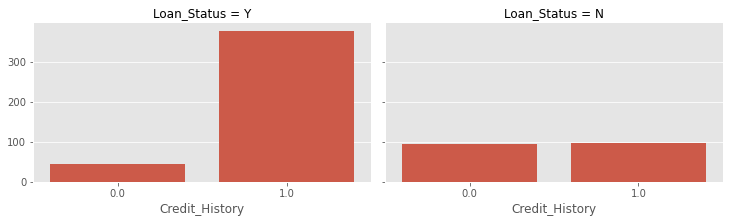

In [22]:
# Credit_History

grid = sns.FacetGrid(loan,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Credit_History');

# we didn't give a loan for most people who got Credit History = 0
# but we did give a loan for most of people who got Credit History = 1
# so we can say if you got Credit History = 1 , you will have better chance to get a loan

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


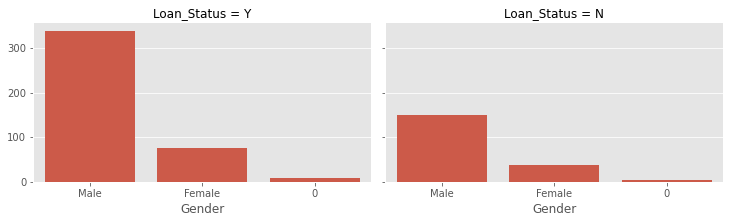

In [23]:
# Gender

grid = sns.FacetGrid(loan,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Gender');

# most males got loan and most females got one too so (No pattern)

# i think it's not so important feature, we will see later

In [24]:
loan['Gender'].value_counts()

Male      489
Female    112
0          13
Name: Gender, dtype: int64

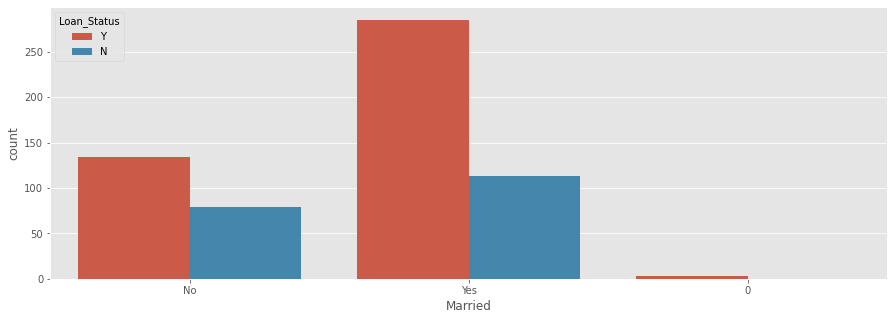

In [25]:
# Married
plt.figure(figsize=(15,5))
sns.countplot(x='Married', hue='Loan_Status', data=loan);

# most people who get married did get a loan
# if you'r married then you have better chance to get a loan :)
# good feature

In [26]:
loan['Married'].value_counts()

Yes    398
No     213
0        3
Name: Married, dtype: int64

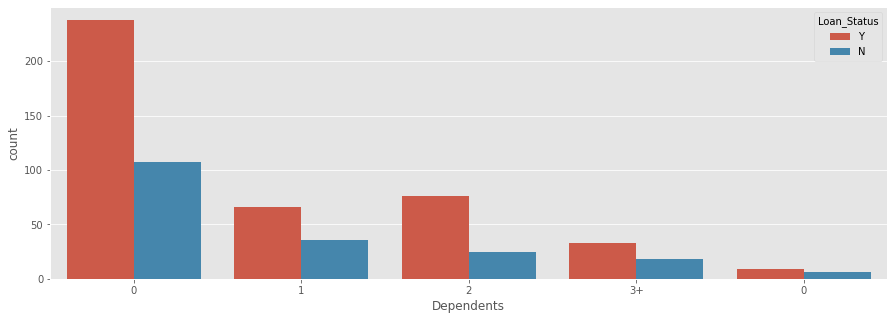

In [27]:
# Dependents

plt.figure(figsize=(15,5))
sns.countplot(x='Dependents', hue='Loan_Status', data=loan);

# first if Dependents = 0 , we got higher chance to get a loan ((very hight chance))
# good feature

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


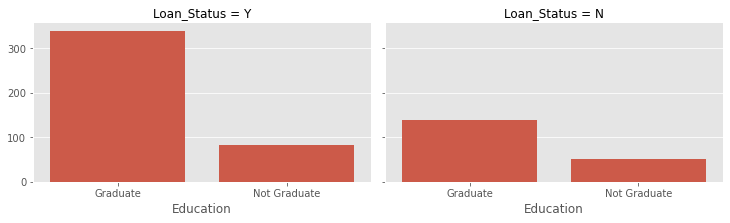

In [28]:
# Education

grid = sns.FacetGrid(loan,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Education');

# If you are graduated or not, you will get almost the same chance to get a loan (No pattern)
# Here you can see that most people did graduated, and most of them got a loan
# on the other hand, most of people who did't graduate also got a loan, but with less percentage from people who graduated

# not important feature

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


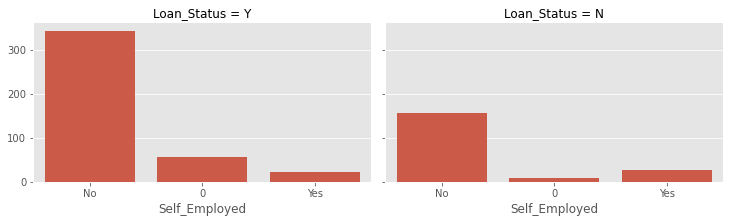

In [29]:
# Self_Employed

grid = sns.FacetGrid(loan,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Self_Employed');

# No pattern (same as Education)

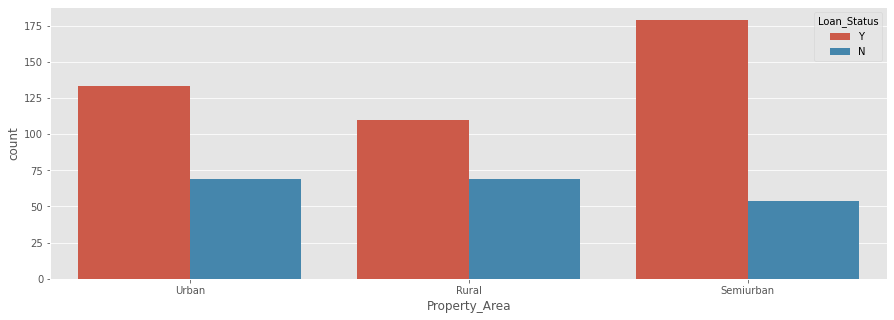

In [30]:
# Property_Area

plt.figure(figsize=(15,5))
sns.countplot(x='Property_Area', hue='Loan_Status', data=loan);

# We can say, Semiurban Property_Area got more than 50% chance to get a loan

# good feature

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


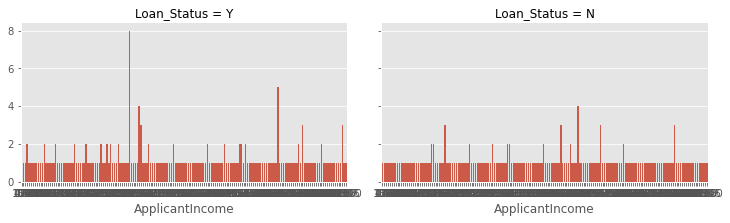

In [31]:
# Self_Employed

grid = sns.FacetGrid(loan,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'ApplicantIncome');

# No pattern (same as Education)

In [32]:
# the numerical data

loan.groupby('Loan_Status').median() # median because Not affected with outliers

# we can see that when we got low median in CoapplicantInocme we got Loan_Status = N

# CoapplicantInocme is a good feature

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,3833.5,268.0,126.5,360.0,1.0
Y,3812.5,1239.5,125.0,360.0,1.0


In [33]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Looking for outliers of the numerical features. 

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome'>

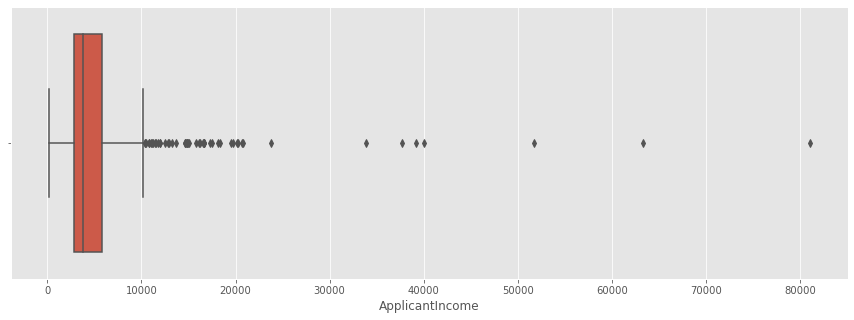

In [34]:
import seaborn as sns
sns.boxplot(loan['ApplicantIncome'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CoapplicantIncome'>

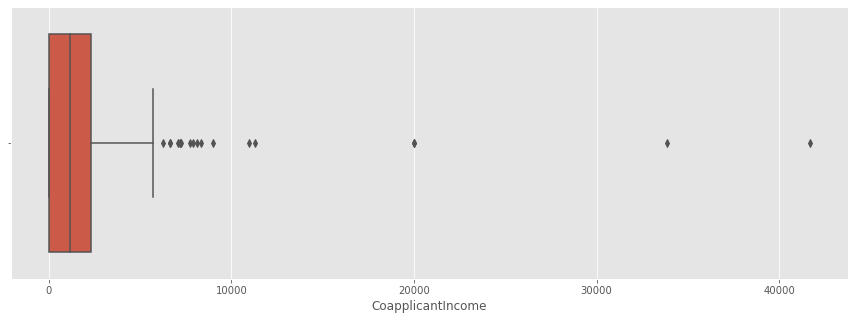

In [35]:
sns.boxplot(loan['CoapplicantIncome'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount'>

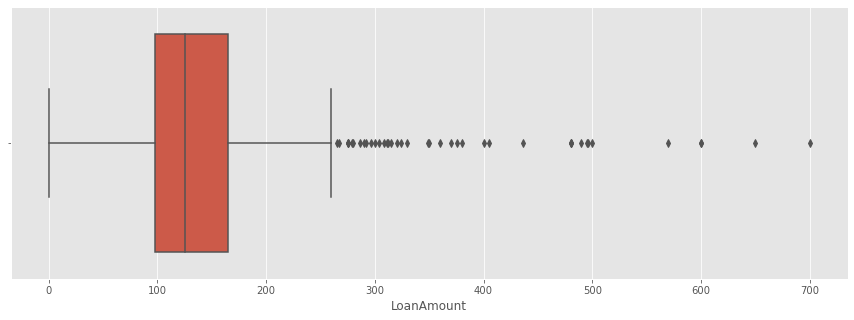

In [36]:
sns.boxplot(loan['LoanAmount'])

All the above boxplots have significant amounts of outliers. It is quite acceptable for features such as income and certain loan amounts to have values far from the mean. There are acceptable sets of outliers for this scenario.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Amount_Term'>

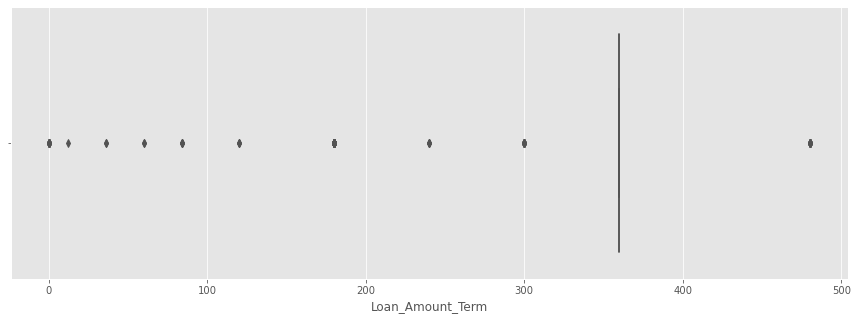

In [37]:
sns.boxplot(loan['Loan_Amount_Term'])

In [38]:
loan['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
0.0       14
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>, <AxesSubplot:>]],
      dtype=object)

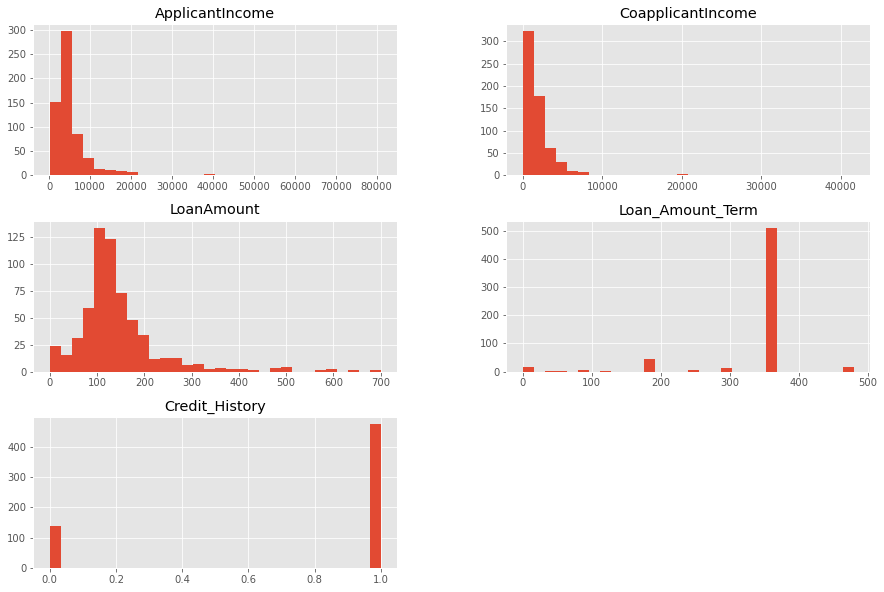

In [39]:
loan.hist(bins=30, figsize=(15, 10))

Applicants incomes are rightly skewed and it is quite expected in these type of features

In [40]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Below transforms the target column

In [41]:
# transform the target column
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
target_values = {'Y': 1 , 'N' : 0}

target = loan['Loan_Status']
target= target.map(target_values)

In [42]:
loan['Loan_Status'] = le.fit_transform(loan['Loan_Status'].astype(str))

In [43]:
loan.Loan_Status.unique()

array([1, 0])

In [44]:
target.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [45]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [46]:
loan['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

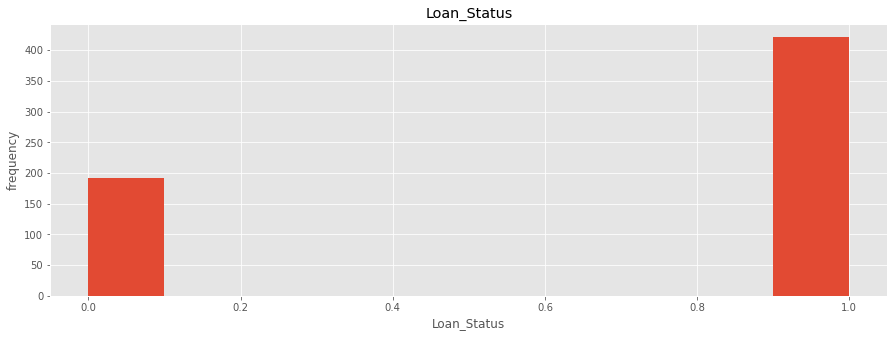

In [47]:
frame = loan.hist('Loan_Status', bins= 10)

for ax in frame.flatten():
    ax.set_xlabel("Loan_Status")
    ax.set_ylabel("frequency")

In [48]:
## Target Variable
y=loan['Loan_Status']
y.shape

(614,)

# Feature Selection and Feature Engineering

<AxesSubplot:>

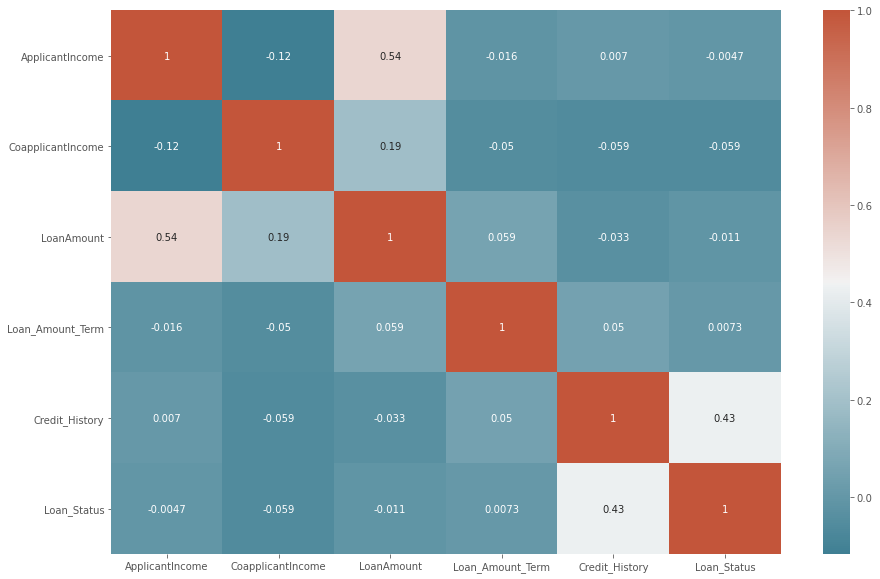

In [49]:
corr = loan.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [50]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [51]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [52]:
loan2 = pd.get_dummies(data = loan, columns = ['Gender', 'Married', 'Education','Self_Employed','Property_Area'], 
                                      prefix = ['Gender', 'Married', 'Education','Self_Employed','Property_Area'], drop_first=True)
loan2.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,5849,0.0,0.0,360.0,1.0,1,0,1,1,0,0,1,0,0,1
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,0,0,1,0,1,0,1,0,0,0
2,LP001005,0,3000,0.0,66.0,360.0,1.0,1,0,1,0,1,0,0,1,0,1
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,1,0,1,0,1,1,1,0,0,1
4,LP001008,0,6000,0.0,141.0,360.0,1.0,1,0,1,1,0,0,1,0,0,1


In [53]:
loan2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  614 non-null    object 
 1   Dependents               614 non-null    object 
 2   ApplicantIncome          614 non-null    int64  
 3   CoapplicantIncome        614 non-null    float64
 4   LoanAmount               614 non-null    float64
 5   Loan_Amount_Term         614 non-null    float64
 6   Credit_History           614 non-null    float64
 7   Loan_Status              614 non-null    int64  
 8   Gender_Female            614 non-null    uint8  
 9   Gender_Male              614 non-null    uint8  
 10  Married_No               614 non-null    uint8  
 11  Married_Yes              614 non-null    uint8  
 12  Education_Not Graduate   614 non-null    uint8  
 13  Self_Employed_No         614 non-null    uint8  
 14  Self_Employed_Yes        6

<AxesSubplot:>

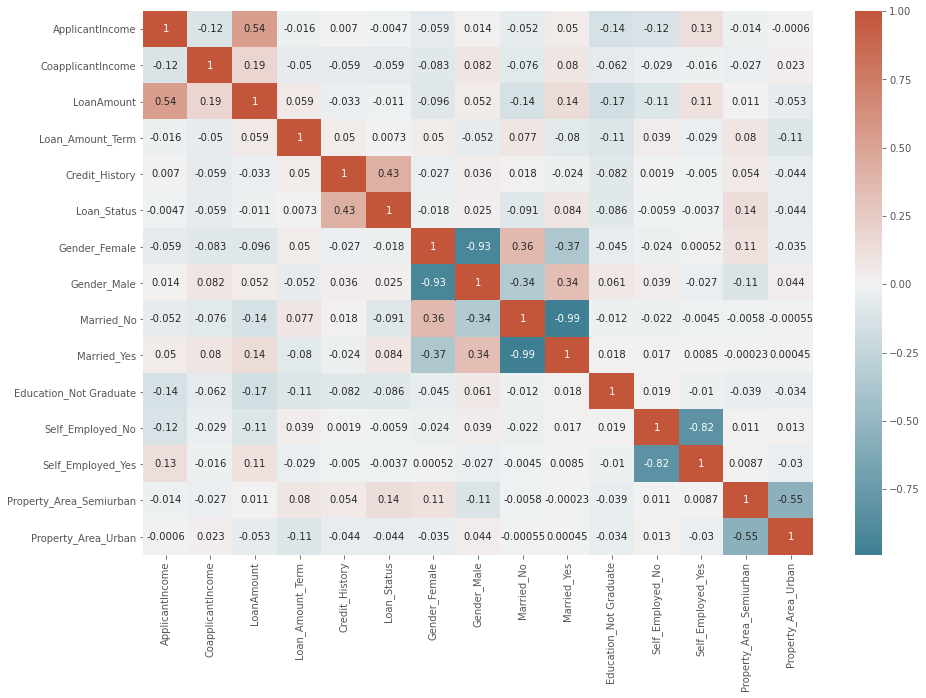

In [54]:
corr = loan2.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [55]:
loan2.columns

Index(['Loan_ID', 'Dependents', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [56]:
# Set Feature Both Numerical, Categorical
X = loan2[['Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Gender_Female','Gender_Male','Married_No','Married_Yes','Education_Not Graduate','Self_Employed_No','Self_Employed_Yes','Property_Area_Semiurban','Property_Area_Urban']]
y = loan2['Loan_Status']

In [57]:
X

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,0.0,360.0,1.0,0,1,1,0,0,1,0,0,1
1,1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,1,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,0,1,0,1,0,0,1,0,1
3,0,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,1,0,0,1
4,0,6000,0.0,141.0,360.0,1.0,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1.0,1,0,1,0,0,1,0,0,0
610,3+,4106,0.0,40.0,180.0,1.0,0,1,0,1,0,1,0,0,0
611,1,8072,240.0,253.0,360.0,1.0,0,1,0,1,0,1,0,0,1
612,2,7583,0.0,187.0,360.0,1.0,0,1,0,1,0,1,0,0,1


In [58]:
X2 = X.replace('3+',3, regex=True)

In [59]:
X2

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,0.0,360.0,1.0,0,1,1,0,0,1,0,0,1
1,1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,1,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,0,1,0,1,0,0,1,0,1
3,0,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,1,0,0,1
4,0,6000,0.0,141.0,360.0,1.0,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1.0,1,0,1,0,0,1,0,0,0
610,3,4106,0.0,40.0,180.0,1.0,0,1,0,1,0,1,0,0,0
611,1,8072,240.0,253.0,360.0,1.0,0,1,0,1,0,1,0,0,1
612,2,7583,0.0,187.0,360.0,1.0,0,1,0,1,0,1,0,0,1


In [60]:
loan2['Dependents'].describe()

count     614
unique      5
top         0
freq      345
Name: Dependents, dtype: object

In [61]:
loan2['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [62]:
loan2['CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [63]:
loan2['LoanAmount'].describe()

count    614.000000
mean     141.166124
std       88.340630
min        0.000000
25%       98.000000
50%      125.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64

In [64]:
loan2['Loan_Amount_Term'].describe()

count    614.000000
mean     334.201954
std       82.183884
min        0.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

In [65]:
loan2['Credit_History'].describe()

count    614.000000
mean       0.773616
std        0.418832
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64

# Split the data

In [66]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X2, y, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(460, 15) (154, 15) (460,) (154,)


# Modelling

Modelling using: Decision Tree, Random Forest, Naives Bayes, Ensemble methods, K-Nearest Neighbour, Logistic Regression, Support Vector Machine

# Logistic Regression

In [67]:
reg = LogisticRegression(max_iter=1000)

# Fit Model
reg.fit(X_train, y_train)
y_pred_test =reg.predict(X_test)
y_pred_train =reg.predict(X_train)

# Score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_test)

0.7532467532467533

In [68]:
reg.coef_

array([[ 6.54543324e-03, -1.04183447e-05, -6.03142472e-05,
         3.90759661e-04, -2.28024377e-03,  1.79446456e+00,
         6.80516535e-02, -4.06874670e-03, -1.63005758e-01,
         2.65569962e-01, -3.21287197e-01,  2.36896641e-02,
        -7.23594326e-02,  6.96623870e-01, -1.04999694e-01]])

In [69]:
X_train.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [70]:
from sklearn.metrics import confusion_matrix
cfm_1=confusion_matrix(y_test, y_pred_test)
cfm_1

array([[ 16,  33],
       [  5, 100]])

In [71]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred_test)
recall

0.9523809523809523

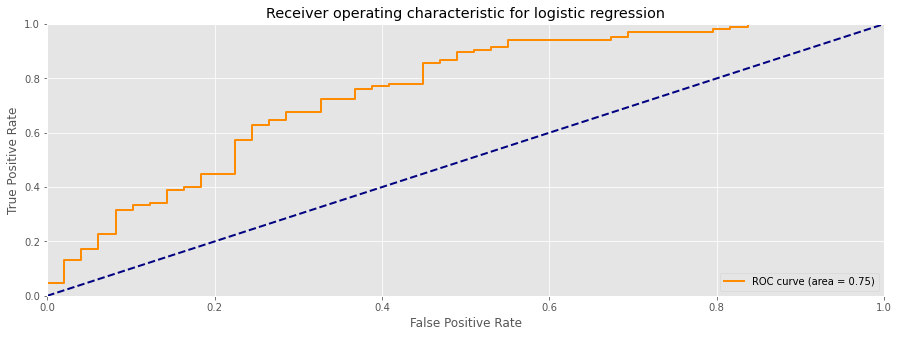

In [72]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = reg.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for logistic regression')
plt.legend(loc = "lower right")
plt.show()

# Support Vector Machine

In [73]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC(probability=True) #Default hyperparameters


# Fit Model
svc.fit(X_train, y_train)
y_pred_test =svc.predict(X_test)
y_pred_train =svc.predict(X_train)

# Score
accuracy_score(y_test, y_pred_test)

0.6753246753246753

In [74]:
cfm_2=confusion_matrix(y_test, y_pred_test)
cfm_2

array([[  0,  49],
       [  1, 104]])

In [75]:
recall = recall_score(y_test, y_pred_test)
recall

0.9904761904761905

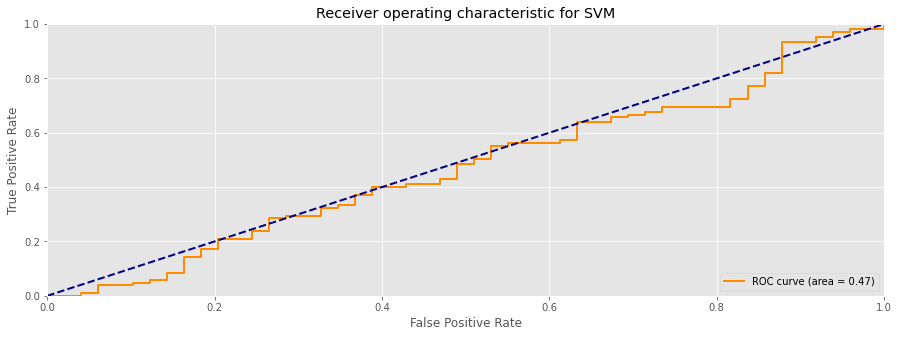

In [76]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = svc.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for SVM')
plt.legend(loc = "lower right")
plt.show()

# Naive Bayes

In [77]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

gnb = GaussianNB()

# Fit Model
gnb.fit(X_train, y_train)
y_pred_test =gnb.predict(X_test)
y_pred_train =gnb.predict(X_train)

# Score
accuracy_score(y_test, y_pred_test)

0.7012987012987013

In [78]:
cfm_3=confusion_matrix(y_test, y_pred_test)
cfm_3

array([[13, 36],
       [10, 95]])

In [79]:
recall = recall_score(y_test, y_pred_test)
recall

0.9047619047619048

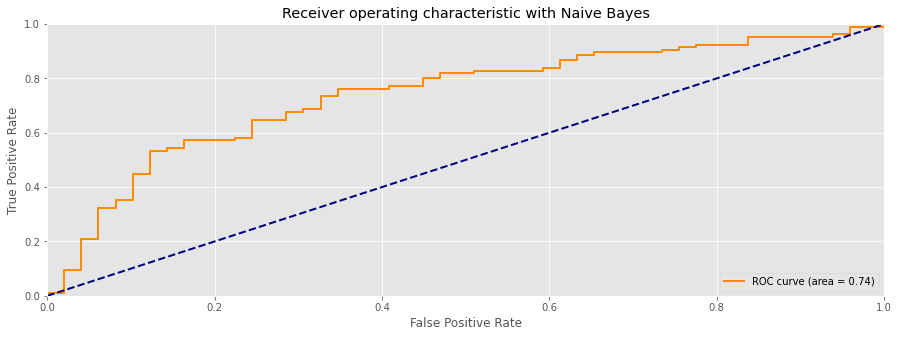

In [80]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = gnb.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with Naive Bayes')
plt.legend(loc = "lower right")
plt.show()

# Decision Tree Classifier

In [81]:
from sklearn import tree

clf_dt = tree.DecisionTreeClassifier(max_depth=5)


# Fit Model
clf_dt.fit(X_train, y_train)
y_pred_test =clf_dt.predict(X_test)
y_pred_train =clf_dt.predict(X_train)

# Score
accuracy_score(y_test, y_pred_test)

0.7662337662337663

In [82]:
cfm_4=confusion_matrix(y_test, y_pred_test)
cfm_4

array([[21, 28],
       [ 8, 97]])

In [83]:
recall = recall_score(y_test, y_pred_test)
recall

0.9238095238095239

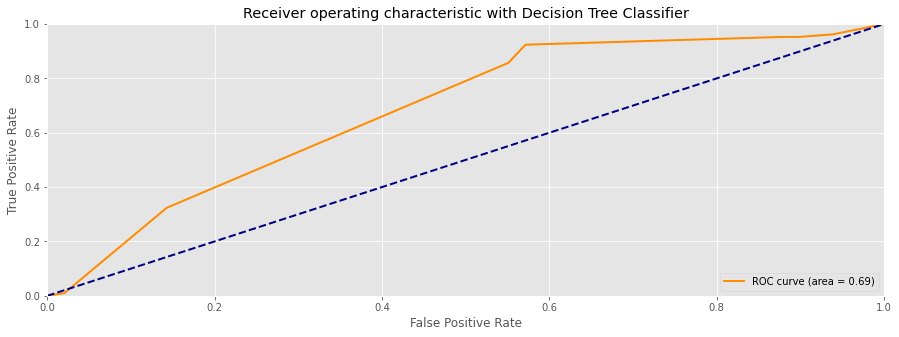

In [84]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = clf_dt.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with Decision Tree Classifier')
plt.legend(loc = "lower right")
plt.show()

# Random Forest Classifier

In [85]:
from sklearn import ensemble
clf_rf = ensemble.RandomForestClassifier(n_estimators=100, warm_start=True)
clf_rf.fit(X_train, y_train)

y_pred_test =clf_rf.predict(X_test)
y_pred_train =clf_rf.predict(X_train)

accuracy_score(y_test, y_pred_test)

0.7012987012987013

In [86]:
cfm_5=confusion_matrix(y_test, y_pred_test)
cfm_5

array([[16, 33],
       [13, 92]])

In [87]:
recall = recall_score(y_test, y_pred_test)
recall

0.8761904761904762

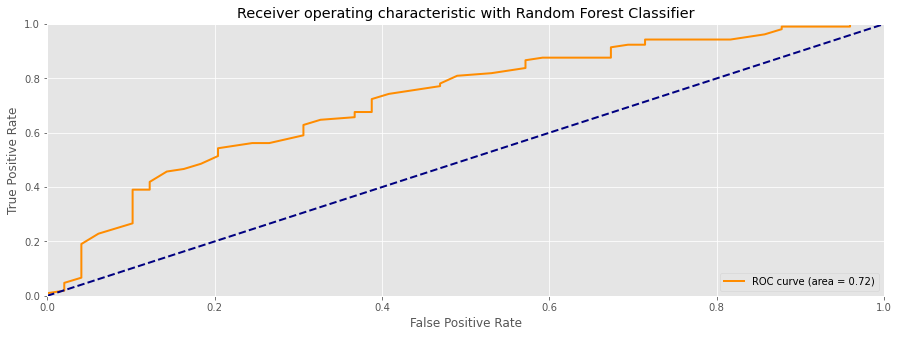

In [88]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = clf_rf.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with Random Forest Classifier')
plt.legend(loc = "lower right")
plt.show()

# Random Forest with Under_sampling

In [91]:
import six

In [92]:
import sys

In [93]:
sys.modules['sklearn.externals.six'] = six

In [94]:
import joblib

In [95]:
sys.modules['sklearn.externals.joblib'] = joblib

In [96]:
from imblearn.ensemble import BalancedRandomForestClassifier 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in

In [102]:
# from sklearn import ensemble
# clf_rf_u = BalancedRandomForestClassifier(n_estimators=100, warm_start=True)
# clf_rf_u.fit(X_train, y_train)

# y_pred_test =clf_rf.predict(X_test)
# y_pred_train =clf_rf.predict(X_train)

# accuracy_score(y_test, y_pred_test)

# Random Forest with Class Weighting

In [98]:
clf_rf_w = ensemble.RandomForestClassifier(n_estimators=100, warm_start=True, class_weight='balanced')
clf_rf_w.fit(X_train, y_train)

y_pred_test =clf_rf_w.predict(X_test)
y_pred_train =clf_rf_w.predict(X_train)

accuracy_score(y_test, y_pred_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '


0.7142857142857143

In [100]:
cfm_rf_b=confusion_matrix(y_test, y_pred_test)
cfm_rf_b

array([[17, 32],
       [12, 93]])

In [101]:
recall = recall_score(y_test, y_pred_test)
recall

0.8857142857142857

# KNN Classifier

In [89]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(X_train, y_train)

y_pred_test =clf_knn.predict(X_test)
y_pred_train =clf_knn.predict(X_train)

accuracy_score(y_test, y_pred_test)

0.5909090909090909

In [90]:
cfm_6=confusion_matrix(y_test, y_pred_test)
cfm_6

array([[ 9, 40],
       [23, 82]])

In [91]:
recall = recall_score(y_test, y_pred_test)
recall

0.780952380952381

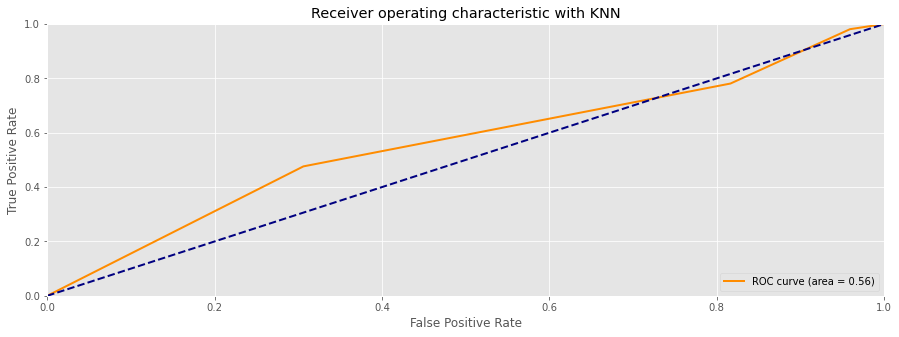

In [92]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = clf_knn.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with KNN')
plt.legend(loc = "lower right")
plt.show()

# Ensemble Methods

# Bagging Meta Estimator

Here we build several estimators independently and then averaging predictions and combine estimators. These are better than single bag estimators that reduces variance.


# Pairing with KNN

In [93]:
from sklearn.ensemble import BaggingClassifier

In [94]:
m = KNeighborsClassifier(n_neighbors=3)
bag = BaggingClassifier(
        m,
        max_samples=0.5,
        max_features=2,
        n_jobs=2,
        oob_score=True)
#out of bag score. method of measuring the prediction error of random forests, boosted decision trees, 
#and other machine learning models utilizing bootstrap aggregating (bagging)
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),
                  max_features=2, max_samples=0.5, n_jobs=2, oob_score=True)

In [95]:
bag.predict(X_test)

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [96]:
bag.predict_proba(X_test)

array([[0.36666667, 0.63333333],
       [0.5       , 0.5       ],
       [0.23333333, 0.76666667],
       [0.36666667, 0.63333333],
       [0.23333333, 0.76666667],
       [0.16666667, 0.83333333],
       [0.3       , 0.7       ],
       [0.4       , 0.6       ],
       [0.13333333, 0.86666667],
       [0.36666667, 0.63333333],
       [0.26666667, 0.73333333],
       [0.3       , 0.7       ],
       [0.2       , 0.8       ],
       [0.3       , 0.7       ],
       [0.33333333, 0.66666667],
       [0.26666667, 0.73333333],
       [0.16666667, 0.83333333],
       [0.33333333, 0.66666667],
       [0.36666667, 0.63333333],
       [0.46666667, 0.53333333],
       [0.33333333, 0.66666667],
       [0.43333333, 0.56666667],
       [0.26666667, 0.73333333],
       [0.3       , 0.7       ],
       [0.46666667, 0.53333333],
       [0.16666667, 0.83333333],
       [0.13333333, 0.86666667],
       [0.3       , 0.7       ],
       [0.26666667, 0.73333333],
       [0.13333333, 0.86666667],
       [0.

In [97]:
accuracy_score(y_test, y_pred_test)

0.5909090909090909

In [98]:
recall_score(y_test, y_pred_test)

0.780952380952381

# Default BaggingClassifier - Decision Tree Classifier

In [99]:
bag = BaggingClassifier(
        max_samples=0.5,
        max_features=2,
        n_jobs=2,
        oob_score=True)
#out of bag score. method of measuring the prediction error of random forests, boosted decision trees, 
#and other machine learning models utilizing bootstrap aggregating (bagging)
bag.fit(X_train, y_train)

y_pred_test = bag.predict(X_test)
y_pred_train = bag.predict(X_train)

In [100]:
accuracy_score(y_test, y_pred_test)

0.6688311688311688

In [101]:
recall_score(y_test, y_pred_test)

0.9714285714285714

# Bagging with Random undersampling

In [103]:
import six

In [104]:
import sys

In [105]:
sys.modules['sklearn.externals.six'] = six

In [107]:
import joblib

In [108]:
sys.modules['sklearn.externals.joblib'] = joblib

In [109]:
from imblearn.ensemble import BalancedBaggingClassifier

In [110]:
bag_u = BalancedBaggingClassifier(
        max_samples=0.5,
        max_features=2,
        n_jobs=2,
        oob_score=True)
#out of bag score. method of measuring the prediction error of random forests, boosted decision trees, 
#and other machine learning models utilizing bootstrap aggregating (bagging)
bag.fit(X_train, y_train)

y_pred_test = bag.predict(X_test)
y_pred_train = bag.predict(X_train)

In [111]:
accuracy_score(y_test, y_pred_test)

0.6753246753246753

In [112]:
recall_score(y_test, y_pred_test)

0.9809523809523809

# Boosting

# Gradient Boosting Classifier

In [709]:
clf_gb = ensemble.GradientBoostingClassifier()
clf_gb.fit(X_train, y_train)

y_pred_test =clf_gb.predict(X_test)
y_pred_train =clf_gb.predict(X_train)

accuracy_score(y_test, y_pred_test)

0.7207792207792207

In [710]:
cfm9=confusion_matrix(y_test, y_pred_test)
TP = cfm5[1, 1]
TN = cfm5[0, 0]
FP = cfm5[0, 1]
FN = cfm5[1, 0]
(TP,FP,FN,TN)
cfm9

array([[17, 32],
       [11, 94]])

In [711]:
recall = recall_score(y_test, y_pred_test)
recall

0.8952380952380953

# Tune the (best classifier) using hyperparameters

In [712]:
# clf_gb = ensemble.GradientBoostingClassifier(n_estimators=40)#previously 100
# clf_gb.fit(X_train, y_train)

# y_pred_test =clf_gb.predict(X_test)
# y_pred_train =clf_gb.predict(X_train)

# accuracy_score(y_test, y_pred_test)

0.7337662337662337

In [713]:
# cfm8=confusion_matrix(y_test, y_pred_test)
# TP = cfm5[1, 1]
# TN = cfm5[0, 0]
# FP = cfm5[0, 1]
# FN = cfm5[1, 0]
# (TP,FP,FN,TN)
# cfm8

array([[18, 31],
       [10, 95]])

In [714]:
# recall = recall_score(y_test, y_pred_test)
# recall

0.9047619047619048

In [715]:
# precision = TP / float(TP + FP)
# precision

0.7698412698412699

In [716]:
# F1_score = 2* (precision * recall) / (precision + recall)
# F1_score

0.8318663958474385

In [717]:
# mcc = matthews_corrcoef(y_test, y_pred_test)
# mcc

0.32860264730588296

# Adaboost Classifier

In [718]:
clf_ab = ensemble.AdaBoostClassifier()#previously 
clf_ab.fit(X_train, y_train)

y_pred_test =clf_ab.predict(X_test)
y_pred_train =clf_ab.predict(X_train)

accuracy_score(y_test, y_pred_test)

0.7597402597402597

In [719]:
cfm10=confusion_matrix(y_test, y_pred_test)
TP = cfm5[1, 1]
TN = cfm5[0, 0]
FP = cfm5[0, 1]
FN = cfm5[1, 0]
(TP,FP,FN,TN)
cfm10

array([[21, 28],
       [ 9, 96]])

In [720]:
recall = recall_score(y_test, y_pred_test)
recall

0.9142857142857143

# Feature Importance from different classifiers

In [103]:
# cols = loan2.columns.values
# feature_dataframe = pd.DataFrame({
#     'Feature':        cols,
#     'Random Forest':  clf_rf.feature_importances(x_train, y_train),
#     'AdaBoost':       clf_ab.feature_importances(x_train, y_train),
#     'Gradient Boost': clf_gb.feature_importances(x_train, y_train)
# })

In [105]:
# feature_dataframe

In [ ]:
# fig = plt.figure(figsize = (15, 6))

# ind = np.arange(len(cols)) 
# width = 0.2

# for i, m in enumerate(feature_dataframe.columns[1:]):
#     plt.bar(ind + ((i - 1 - width) * width), feature_dataframe[m], width, label = m)
    
# plt.title('Feature Importance')
# plt.xticks(ind, cols, rotation = 45)
# plt.ylabel('Score')
# plt.legend()
# plt.show()